## Flight_ticket_price_Dataset

I have collected this dataset fro the github link(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).This dataset shows the data of various region,routes and duration of flights on the basis of which,we have to predict the price.

i imported numpy and pandas for data operations,matplotlib and seaborn for visualization process and sklearn libraries modules for data shaping and metrics evaluation.

In [1]:
#importing the required libraries and metrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset from the file folder
f1=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets/Data_Train.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
flight1=pd.DataFrame(f1)
flight1["data"]="train"
f2=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets/Test_set.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
flight2=pd.DataFrame(f2)
flight2["data"]="test"

In [3]:
#looking for the structure of the train data
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-05-26 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-05-26 05:50:00,2020-05-26 13:15:00,7h 25m,2 stops,No info,7662,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-05-26 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-05-26 18:05:00,2020-05-26 23:30:00,5h 25m,1 stop,No info,6218,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-05-26 16:50:00,2020-05-26 21:35:00,4h 45m,1 stop,No info,13302,train


In [4]:
#looking for the structure of the test data
flight2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,data
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2020-05-26 17:30:00,2020-06-07 04:25:00,10h 55m,1 stop,No info,test
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2020-05-26 06:20:00,2020-05-26 10:20:00,4h,1 stop,No info,test
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-05-26 19:15:00,2020-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,test
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-05-26 08:00:00,2020-05-26 21:00:00,13h,1 stop,No info,test
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2020-05-26 23:55:00,2020-06-25 02:45:00,2h 50m,non-stop,No info,test


In [5]:
#looking for the shape of the dataset
print(flight1.shape)
print(flight2.shape)

(10683, 12)
(2671, 11)


In [6]:
#checkung for null values in train data
flight1.isnull().sum()

#it shows we have null data in route and Total_stops column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
data               0
dtype: int64

In [7]:
#lets check for null values in test dataset
flight2.isnull().sum()

#There is no null values in the test dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
data               0
dtype: int64

In [8]:
#getting the mode values from route in train dataset
flight1['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [9]:
#getting the mode values from total_stops in train dataset
flight1['Total_Stops'].mode()

0    1 stop
dtype: object

In [10]:
#replacing the null values using mode values in train dataset
flight1['Route']=flight1['Route'].replace(np.NaN,'DEL → BOM → COK')
flight1['Total_Stops']=flight1['Total_Stops'].replace(np.NaN,'1 stop')

In [11]:
#Merging the datasets 
flight=pd.concat([flight1,flight2],ignore_index=True)

In [12]:
#checking for the datatypes
flight.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
data                       object
dtype: object

In [13]:
#getting the counts for unique values in each column
for col in flight.columns:
    print(flight[col].value_counts())

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64
2020-05-26 19:00:00    536
2020-05-26 21:00:00    46

In [14]:
#lets drop some columns which are unnecessary for prediction
flight.drop(['Date_of_Journey','Route'],axis=1,inplace=True)

In [15]:
#in the airline column,jet airways and jet airways bussines are two diffrent columns,similarly multiple carriers and vistara appears,so lets convert these to single columns
flight["Airline"]=flight["Airline"].replace("Jet Airways Business","Jet Airways")
flight["Airline"]=flight["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")
flight["Airline"]=flight["Airline"].replace("Vistara Premium economy","Vistara")

As we see we have duration,arrival_time and departure time,all in the dataset,so lets take the duration from this diffrence and put to the dataset in right way.Duration given in the data is in object datatype,so lets shape it in right way.

In [16]:
diff=flight['Arrival_Time']-flight['Dep_Time']
diff

0       -66 days +02:50:00
1          0 days 07:25:00
2         14 days 19:00:00
3          0 days 05:25:00
4          0 days 04:45:00
               ...        
13349     11 days 23:55:00
13350      0 days 02:35:00
13351   -81 days +06:35:00
13352      0 days 15:15:00
13353      0 days 14:20:00
Length: 13354, dtype: timedelta64[ns]

In [17]:
list=[]
for time in range(len(diff)):
    interval=diff.iloc[time].seconds/3600
    list.append(interval)
flight["Duration"]=list

In [18]:
flight

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Source,Total_Stops,data
0,No info,IndiGo,2020-03-22 01:10:00,2020-05-26 22:20:00,New Delhi,2.833333,3897.0,Banglore,non-stop,train
1,No info,Air India,2020-05-26 13:15:00,2020-05-26 05:50:00,Banglore,7.416667,7662.0,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2020-05-26 09:25:00,Cochin,19.000000,13882.0,Delhi,2 stops,train
3,No info,IndiGo,2020-05-26 23:30:00,2020-05-26 18:05:00,Banglore,5.416667,6218.0,Kolkata,1 stop,train
4,No info,IndiGo,2020-05-26 21:35:00,2020-05-26 16:50:00,New Delhi,4.750000,13302.0,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2020-05-26 20:30:00,Banglore,23.916667,NaN,Kolkata,1 stop,test
13350,No info,IndiGo,2020-05-26 16:55:00,2020-05-26 14:20:00,Banglore,2.583333,NaN,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2020-05-26 21:50:00,Cochin,6.583333,NaN,Delhi,1 stop,test
13352,No info,Air India,2020-05-26 19:15:00,2020-05-26 04:00:00,Cochin,15.250000,NaN,Delhi,1 stop,test


In [19]:
#as we have duration in proper way,so lets drop the arrival time and departure time
flight.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [20]:
#lets check for any null values
flight.isnull().sum()
#so we see earlier the test dataset has one less column of price,so there is no need to manage this null. 

Additional_Info       0
Airline               0
Destination           0
Duration              0
Price              2671
Source                0
Total_Stops           0
data                  0
dtype: int64

Data Visualisation

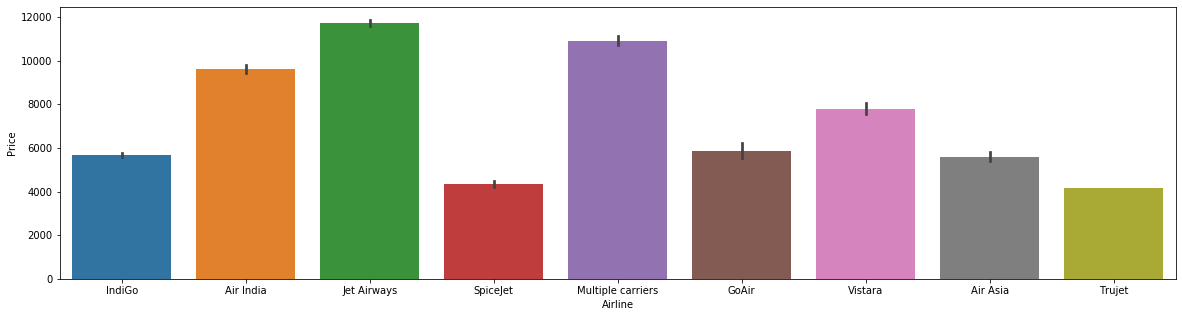

In [21]:
#Analysis of the various airlines 
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=flight)

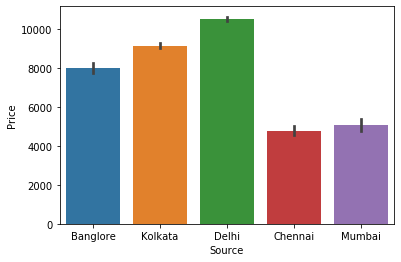

In [22]:
#getting price stats as compared to regions
sns.barplot(x="Source",y="Price",data=flight)

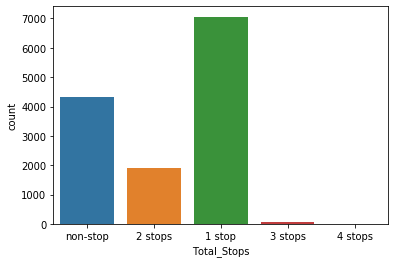

In [23]:
#count for the total stops
sns.countplot(flight['Total_Stops'])

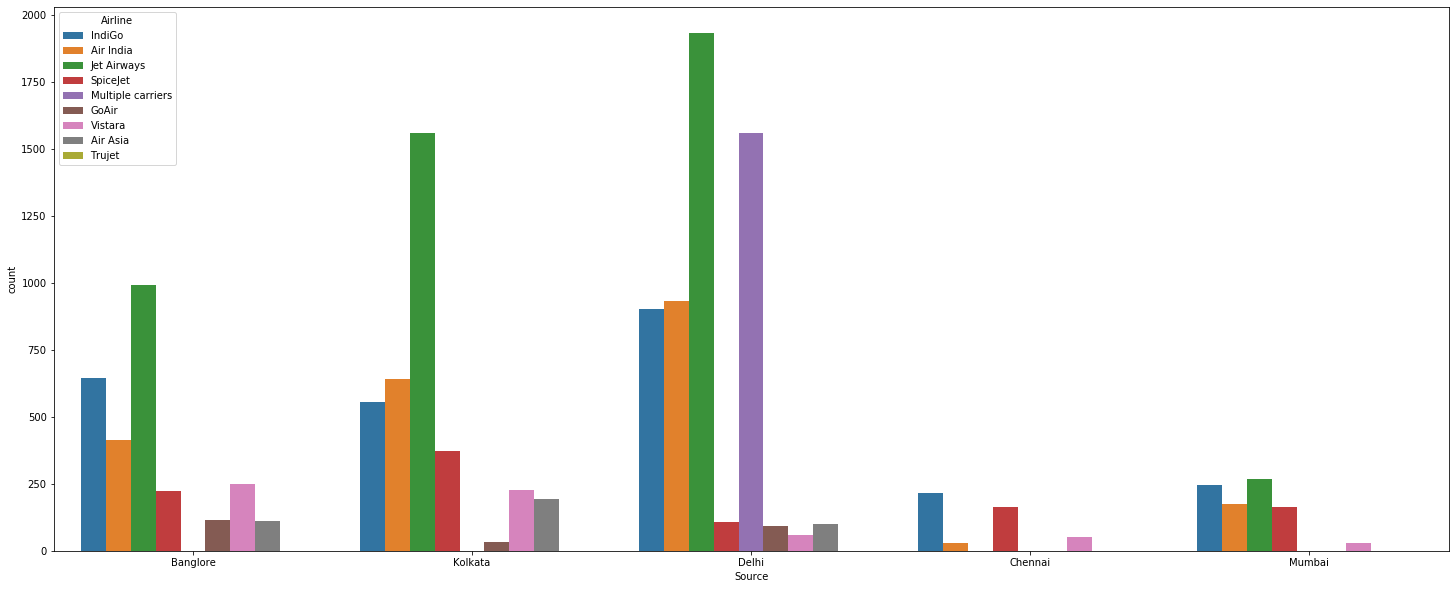

In [24]:
#countplot for count of every regions wrt to airlines
plt.figure(figsize=(25,10))
sns.countplot(x="Source",hue="Airline",data=flight)

In [25]:
#finding the correlation among features
flight.corr()

,Duration,Price
Duration,1.000000,0.450205
Price,0.450205,1.000000


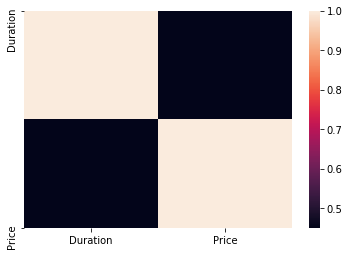

In [26]:
#plotting heatmap for the correlation
sns.heatmap(flight.corr())

In [27]:
#checking for the datatype
flight.dtypes

Additional_Info     object
Airline             object
Destination         object
Duration           float64
Price              float64
Source              object
Total_Stops         object
data                object
dtype: object

In [28]:
#lets convert some object columns to labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Additional_Info','Airline','Destination','Source','Total_Stops']
for val in list:
    flight[val]=le.fit_transform(flight[val].astype(str))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E531936588>,
      dtype=object)

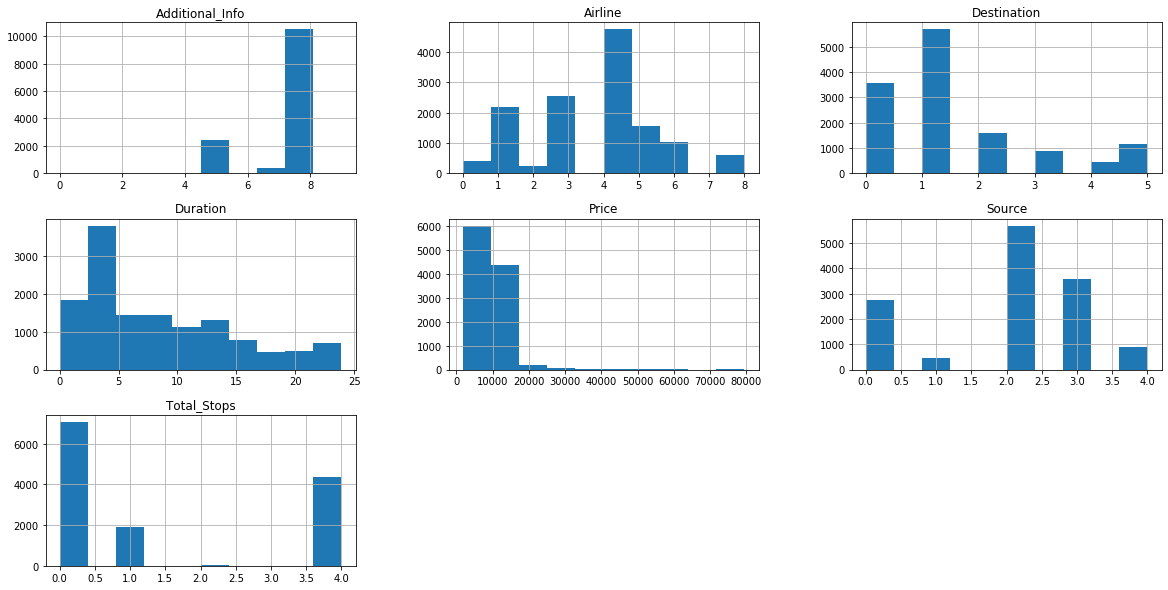

In [29]:
flight.hist(figsize=(20,10))

In [30]:
#Now lets sepearte the train and test dataset

flight_train=flight.loc[flight["data"]=="train"]
flight_test=flight.loc[flight["data"]=="test"]

In [31]:
flight_train.drop('data',axis=1,inplace=True)

getting the statistical summary of data

In [32]:
flight_train.describe()

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,7.393054,3.607133,1.436113,8.206754,9087.064121,1.952261,1.458111
std,1.214211,1.790730,1.474782,6.387288,4611.359167,1.177221,1.806290
min,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000
25%,8.000000,3.000000,0.000000,2.750000,5277.000000,2.000000,0.000000
50%,8.000000,4.000000,1.000000,6.333333,8372.000000,2.000000,0.000000
75%,8.000000,4.000000,2.000000,12.583333,12373.000000,3.000000,4.000000
max,9.000000,8.000000,5.000000,23.916667,79512.000000,4.000000,4.000000


These data seems to be fair and have not much variation in mean and median values here.Some of the data needs to be scaled,so standard scaler need to be applied during execution. 

Shaping the data for machine learning process

In [33]:
mod_x=flight_train.drop('Price',axis=1)
y=flight_train['Price']

In [34]:
mod_x.skew()

Additional_Info   -1.779838
Airline            0.135708
Destination        1.244169
Duration           0.828928
Source            -0.424054
Total_Stops        0.631681
dtype: float64

In [35]:
for col in mod_x.columns:
    if mod_x[col].skew()>0.55:
        mod_x[col]=np.log1p(mod_x[col])
    if mod_x[col].skew()<-0.55:
        mod_x[col]=np.sqrt(mod_x[col])

In [36]:
#scaling the data using standard scaler

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(mod_x)
x=pd.DataFrame(x,columns=mod_x.columns)

In [37]:
#creating function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [38]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [39]:
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print('mean cross_val=',score.mean())
    print('standard deviation=',score.std())

Applying algorithm to the data

In [40]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.31927493412467056 at 98


In [41]:
cross_val(lm)

mean cross_val= 0.3214110328307719
standard deviation= 0.011216230573773378


In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.64693514231521 at 58


In [43]:
cross_val(dtr)

mean cross_val= 0.6687947221957004
standard deviation= 0.03785204877016689


In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#determing best n_neighbors
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 7}

In [45]:
knr=KNeighborsRegressor(n_neighbors=7)
random(knr)

0.6789395251502759 at 99


In [46]:
cross_val(knr)

mean cross_val= 0.6924089809008823
standard deviation= 0.011605471287584957


In [47]:
from sklearn.svm import SVR
svm=SVR()

#detrmining best kernel
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [48]:
svm=SVR(kernel='rbf')
random(svm)

0.0628016923549729 at 65


In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [50]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.7170888837520064 at 79


In [51]:
cross_val(rfr)

mean cross_val= 0.7114988093177927
standard deviation= 0.019525571571111754


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[1,0.1,0.01,0.001],'n_estimators':[10,100,500]}
grid=GridSearchCV(gbr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [53]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
random(gbr)

0.7097405228611189 at 72


In [54]:
cross_val(gbr)

mean cross_val= 0.7151606918880022
standard deviation= 0.015399741735774101


From the above solved algorithms,Random forest regressor has the best r2_score at the random_state of 79.So lets take it as a final algorithm

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=79)
model(rfr)

mean_squared_error= 5521401.258468476
mean_absolute_error= 1384.3762690774138
r2_score= 0.7392542928797041
root_mean_squared_error= 2349.766213577103


Lets apply the best algorithm to the test data also

In [56]:
flight_test

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,data
10683,8,4,1,10.916667,NaN,2,0,test
10684,8,3,0,4.000000,NaN,3,0,test
10685,5,4,1,23.750000,NaN,2,0,test
10686,8,5,1,13.000000,NaN,2,0,test
10687,8,0,2,2.833333,NaN,0,4,test
...,...,...,...,...,...,...,...,...
13349,8,1,0,23.916667,NaN,3,0,test
13350,8,3,0,2.583333,NaN,3,4,test
13351,8,4,1,6.583333,NaN,2,0,test
13352,8,1,1,15.250000,NaN,2,0,test


In [57]:
#lets drop price and data column
flight_test.drop(['Price','data'],axis=1,inplace=True)

In [58]:
#lets scale the data for the modelling
test_x=scale.fit_transform(flight_test)
df_x=pd.DataFrame(test_x,columns=flight_test.columns)

In [59]:
price_pred=rfr.predict(df_x)

In [60]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr,'rfr_flight_ticket.pkl')

['rfr_flight_ticket.pkl']

## Conclusion

After importing the dataset,I checked for the null values for both train & test dataset.Train dataset has some null values identified which i replaced using mode() of the repective column.I drop some of the column which i don't feel as a needy one.Then i concat the bot train and test dataset.I plots various graphs to see the data insights,correlation using heatmap.Then convert the categorical columns to labels using LabelEncoder.As we have to perform operations in train dataset,so i seperate them both from the merged datset.After checking for statistical summary,I seperate the input and target variables and scale the data using Standard scaler.After applying for various algorithms,we get the best fit algorithm from Random Forest Regressor.